In [1]:
# Umut Ekin Gezer   03716498
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



flow_data = pd.read_csv('flowcompletion_data.csv')

Calculation of population mean, count, standard deviation and median

In [2]:
pop_mean = flow_data['completion_time'].mean()
pop_count = len(flow_data['completion_time'])
pop_std = flow_data['completion_time'].std()
pop_median=flow_data['completion_time'].median()

I took 100 sample of each simulation id and algorithm id to conduct Confidence Intervall test

In [3]:
sample_values=flow_data.groupby(by=["simulation_id","algorithm_id"])['completion_time'].apply(lambda x: x.sample(100)).reset_index(drop=True)


Here is the sample values, there are total 30 groups and each group includes 100 samples

In [4]:
print(sample_values)

0       157880.4616
1          300.4480
2         1079.5776
3          401.4960
4          580.8808
           ...     
2995       385.7128
2996       403.2480
2997      2168.9224
2998      1703.1760
2999      1507.5448
Name: completion_time, Length: 3000, dtype: float64


I calculate mean,count, standard deviation each of sample data
    

In [5]:
mean_df = flow_data.groupby(by=["simulation_id","algorithm_id"])['completion_time'].mean().to_frame(name = 'mean_time').reset_index()
std_df=flow_data.groupby(by=["simulation_id","algorithm_id"])['completion_time'].std().to_frame(name = 'std_time').reset_index()

I merged all information in "results" dataframe

In [6]:
results=pd.concat([mean_df,std_df["std_time"]],axis=1)

In [7]:
print(results)

    simulation_id  algorithm_id     mean_time       std_time
0             904             8  26242.263465   87942.240552
1             909             8  27192.605234   87962.901918
2             914             8  33145.973159   93281.204827
3             952            14  18993.889209   80274.289625
4             953            14  19332.347864   78762.953849
5             954            14  22445.019312   81229.450887
6            1020            18  19308.411174   84799.124694
7            1022            18  19876.670717   83270.959669
8            1024            18  22843.440396   85241.572022
9            1068            19  19102.616134   81420.675156
10           1069            19  19530.597065   79956.952409
11           1070            19  22478.948275   82009.606532
12           1164            25  43248.974257  125218.224614
13           1165            26  34937.162318   97990.522819
14           1166            27  34390.495417   96395.121577
15           1167       

In [8]:
#In order to avoid mathematical failures I also convert the values into the numpy array.

sample_mean=np.array(mean_df['mean_time'])
sample_std=np.array(std_df['std_time'])

Below I show Population mean, count, standard deviation and sample mean, count and standard deviation

In [9]:
print("Population mean:",pop_mean)
print("Population standar deviation:",pop_std)
print("********************************************")
print("Sample mean list:",sample_mean)
print("Sample standart deviation list:",sample_std)


Population mean: 27974.943164078268
Population standar deviation: 93871.38586434633
********************************************
Sample mean list: [26242.26346461 27192.60523446 33145.9731591  18993.88920913
 19332.34786424 22445.01931187 19308.41117367 19876.67071735
 22843.44039623 19102.61613404 19530.59706474 22478.94827543
 43248.97425664 34937.16231778 34390.4954171  47292.94328924
 38244.59796537 36705.1426855  53277.8463871  45022.81775894
 44308.62219469 20514.3581835  21038.25947503 20080.58384194
 24496.2277648  23554.58365419 19279.50437571 19929.09756719
 20384.73459448 20075.94257821]
Sample standart deviation list: [ 87942.24055205  87962.90191835  93281.20482652  80274.28962482
  78762.95384894  81229.45088723  84799.12469392  83270.95966912
  85241.5720218   81420.67515622  79956.95240926  82009.60653241
 125218.22461441  97990.52281862  96395.12157734 129729.24582167
 102996.1445853   98203.54097058 129756.00639306 107717.0227039
 105172.28874456  91671.73683324  8974

Here is the distribution sample means of each 30 groups

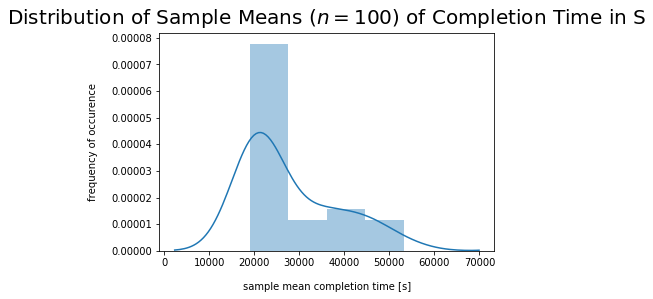

In [10]:
import seaborn as sns

sns.distplot(sample_mean)
plt.title("Distribution of Sample Means ($n=100$) of Completion Time in S", y=1.015, fontsize=20)
plt.xlabel("sample mean completion time [s]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);
plt.savefig('Distribution of Sample Means of Completion Time in S.png')
plt.show()

This distribution of sample means looks left skewed. But no outliers. The simple random samples are independent and success failure condition is satisfied

# I calculate Mean of Sample Means,Median of Sample Means,Standard Deviation of Sample Means:

In [11]:
mean_of_sample_means=np.mean(sample_mean)
median_of_sample_means = np.median(sample_mean)
std_dev_of_sample_means = np.std(sample_mean)

print("Mean of sample means: ",mean_of_sample_means)
print("Median of sample means: ",median_of_sample_means)
print("Standard Deviation of sample means: ",std_dev_of_sample_means)

Mean of sample means:  27909.15587707604
Median of sample means:  22661.194335828277
Standard Deviation of sample means:  10160.30644589403


# Standard Error (SE) calculation:

In [12]:

n=100 #sample_size=100

standard_error = pop_std/np.sqrt(n)
print("Standart_error is: ",standard_error)

Standart_error is:  9387.138586434634


# Example of the group of simulation_id=904 , algorithm_id=8 sample mean






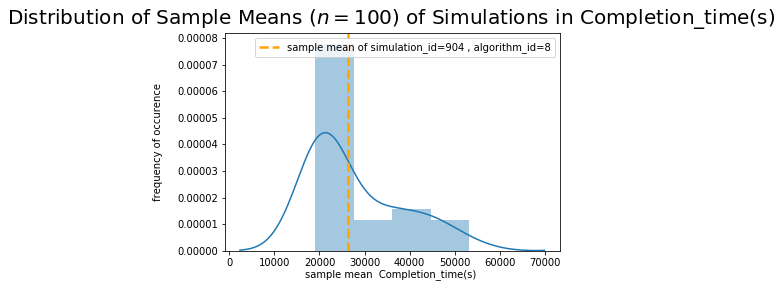

In [13]:
alg8_id904_sample_mean=results.iloc[0,2]
sns.distplot(sample_mean)
plt.title("Distribution of Sample Means ($n=100$) of Simulations in Completion_time(s) ", y=1.015, fontsize=20)
plt.axvline(x=alg8_id904_sample_mean, linestyle='--', linewidth=2.5, label="sample mean of simulation_id=904 , algorithm_id=8", c='orange')
plt.xlabel("sample mean  Completion_time(s) ", labelpad=1)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend()
plt.savefig('Distribution of Sample Means of Completion Time in S with sample_mean.png')
plt.show()

# Z_score calculation of  group of simulation_id=904 , algorithm_id=8 

In [14]:
from scipy import stats
z_score = (alg8_id904_sample_mean - mean_of_sample_means)/standard_error
prop_values_less_than_904_8_sample_mean =  round(stats.norm.cdf(z_score), 3)
print("Z-score of group of simulation_id=904 , algorithm_id=8 :",z_score)
print("The probability of getting a sample mean less than group of simulation_id=904 , algorithm_id=8 sample mean is {0}".format(prop_values_less_than_904_8_sample_mean))

Z-score of group of simulation_id=904 , algorithm_id=8 : -0.1775719402793341
The probability of getting a sample mean less than group of simulation_id=904 , algorithm_id=8 sample mean is 0.43


# Calculate every z-score:

In [15]:

z_scores= (sample_mean- mean_of_sample_means)/standard_error
z_scores=np.array(z_scores)
results["z_scores"]=z_scores.tolist() ##add results dataframe

In [16]:
#See again results dataframe 
print(results)

    simulation_id  algorithm_id     mean_time       std_time  z_scores
0             904             8  26242.263465   87942.240552 -0.177572
1             909             8  27192.605234   87962.901918 -0.076333
2             914             8  33145.973159   93281.204827  0.557872
3             952            14  18993.889209   80274.289625 -0.949732
4             953            14  19332.347864   78762.953849 -0.913677
5             954            14  22445.019312   81229.450887 -0.582088
6            1020            18  19308.411174   84799.124694 -0.916226
7            1022            18  19876.670717   83270.959669 -0.855690
8            1024            18  22843.440396   85241.572022 -0.539644
9            1068            19  19102.616134   81420.675156 -0.938150
10           1069            19  19530.597065   79956.952409 -0.892557
11           1070            19  22478.948275   82009.606532 -0.578473
12           1164            25  43248.974257  125218.224614  1.634131
13    

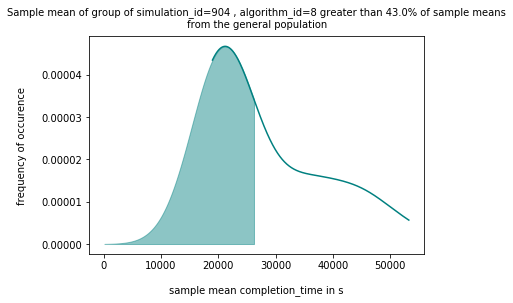

In [17]:
#Example of the combination of simulation_id=904 , algorithm_id=8 with results.iloc[0,2]



kde = stats.gaussian_kde(sample_mean)
pos = np.linspace(np.min(sample_mean), np.max(sample_mean), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(135, results.iloc[0,2], 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.title("Sample mean of group of simulation_id=904 , algorithm_id=8 greater than {0}% of sample means\nfrom the general population".format(round(prop_values_less_than_904_8_sample_mean*100, 2)), y=1.015, fontsize=10)
plt.xlabel("sample mean completion_time in s", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.savefig('Sample mean of group of simulation_id=904 , algorithm_id=8 probability.png')
plt.show()

# To builld 95% confidence Interval for each group, critical z_score=1.96

In [18]:
#Critical Z-Scores:
#95% confidence intervall thus the z-score=1.96



def confidence_intervall_95(means,pop_std):
    
    n=100 #sample_size in data
    
    z_critical = stats.norm.ppf(q = 0.975)
    standard_error = pop_std/np.sqrt(n)
    
    
    confidence_intervall_list=[]
    
    for mean in means:
        
        ##upper and lower bounds calculation
        lower_95_perc_bound = mean - z_critical *standard_error
        upper_95_perc_bound = mean + z_critical*standard_error
        
        if lower_95_perc_bound < 0:  ##Completion Time cannot have negative value. Thus I replace negative values with 0 
            lower_95_perc_bound=0
 
        confidence_intervall=(lower_95_perc_bound,upper_95_perc_bound)
        
        confidence_intervall_list.append(confidence_intervall)
    
    return  confidence_intervall_list
    

See confidence Intervals

In [19]:
print(confidence_intervall_95(sample_mean,pop_std))

[(7843.80991731372, 44640.71701190995), (8794.15168715782, 45591.05878175405), (14747.519611801967, 51544.4267063982), (595.4356618328056, 37392.34275642903), (933.8943169371378, 37730.801411533364), (4046.565764571991, 40843.47285916822), (909.9576263751514, 37706.86472097138), (1478.217170055821, 38275.124264652055), (4444.986848932182, 41241.89394352841), (704.1625867459188, 37501.06968134215), (1132.1435174409307, 37929.05061203716), (4080.494728128142, 40877.40182272437), (24850.5207093415, 61647.42780393773), (16538.70877047711, 53335.61586507334), (15992.041869805027, 52788.94896440126), (28894.48974194117, 65691.3968365374), (19846.14441807069, 56643.05151266692), (18306.689138206457, 55103.59623280269), (34879.39283980218, 71676.29993439841), (26624.36421163848, 63421.27130623471), (25910.168647395927, 62707.07574199216), (2115.904636201347, 38912.81173079758), (2639.8059277360953, 39436.713022332326), (1682.1302946382166, 38479.03738923445), (6097.774217500068, 42894.68131209

Merge each of 95% confidence interval of groups in dataframe as column 95%_confidence_intervall

In [20]:

results["95%_confidence_intervall"]=confidence_intervall_95(sample_mean,pop_std)

See 95% confidence intervalls in dataframe results

In [21]:
print(results)

    simulation_id  algorithm_id     mean_time       std_time  z_scores  \
0             904             8  26242.263465   87942.240552 -0.177572   
1             909             8  27192.605234   87962.901918 -0.076333   
2             914             8  33145.973159   93281.204827  0.557872   
3             952            14  18993.889209   80274.289625 -0.949732   
4             953            14  19332.347864   78762.953849 -0.913677   
5             954            14  22445.019312   81229.450887 -0.582088   
6            1020            18  19308.411174   84799.124694 -0.916226   
7            1022            18  19876.670717   83270.959669 -0.855690   
8            1024            18  22843.440396   85241.572022 -0.539644   
9            1068            19  19102.616134   81420.675156 -0.938150   
10           1069            19  19530.597065   79956.952409 -0.892557   
11           1070            19  22478.948275   82009.606532 -0.578473   
12           1164            25  43248

Example of group of simulation_id=904 , algorithm_id=8 95% of confidence intervall on the sample means distribution
lower_bound is confidence_intervall_95(sample_mean,pop_std)[0][0],upper_bound is confidence_intervall_95(sample_mean,pop_std)[0][1]

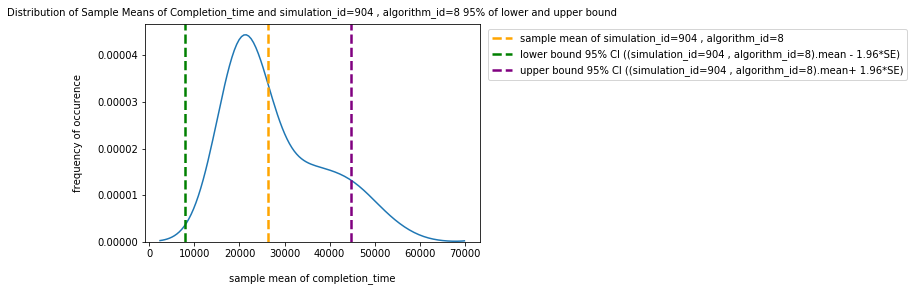

In [22]:


sns.distplot(sample_mean, hist=False)
plt.title("Distribution of Sample Means of Completion_time and simulation_id=904 , algorithm_id=8 95% of lower and upper bound", y=1.015, fontsize=10)
plt.axvline(x=results.iloc[0,2], linestyle='--', linewidth=2.5, label="sample mean of simulation_id=904 , algorithm_id=8 ", c='orange')
plt.axvline(x=confidence_intervall_95(sample_mean,pop_std)[0][0], linestyle='--', linewidth=2.5, label="lower bound 95% CI ((simulation_id=904 , algorithm_id=8).mean - 1.96*SE)", c='g')
plt.axvline(x=confidence_intervall_95(sample_mean,pop_std)[0][1], linestyle='--', linewidth=2.5, label="upper bound 95% CI ((simulation_id=904 , algorithm_id=8).mean+ 1.96*SE)", c='purple')
plt.xlabel("sample mean of completion_time", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
plt.savefig('Lower and upper bound of group of simulation_id=904 , algorithm_id=8 probability.png')
plt.show()


# Plot of each of groups of confidence Intervals

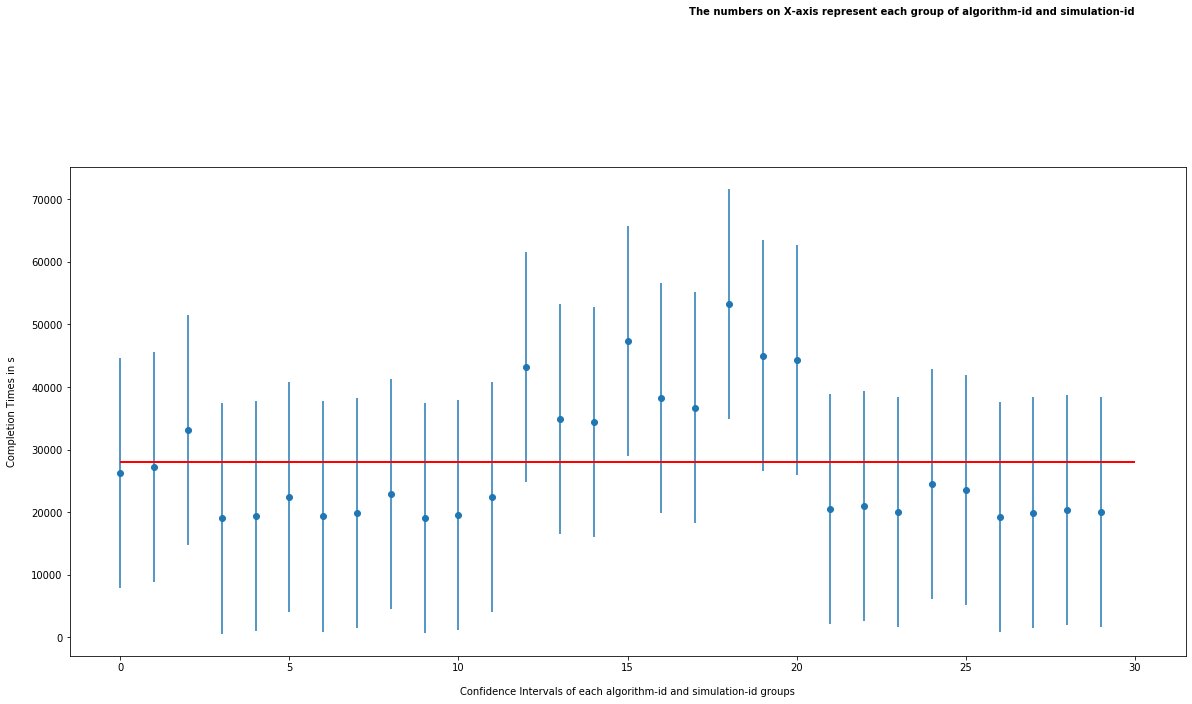

In [23]:
t_b_mean_list=[]

for bot,top in results["95%_confidence_intervall"]:
    
    t_b_mean=(top-bot)/2
    t_b_mean_list.append(t_b_mean)  


plt.figure(figsize=(20,9))

plt.errorbar(x=results["mean_time"].index, 
             y=results["mean_time"],yerr=t_b_mean_list,fmt='o')

plt.hlines(xmin=0, xmax=30,
           y=pop_mean, 
           linewidth=2.0,
           color="red");
plt.text(30, 100000, "The numbers on X-axis represent each group of algorithm-id and simulation-id" ,ha="right", 
         va="center", size=10,fontdict={'weight': 'bold', 'size': 5})
plt.ylabel("Completion Times in s", labelpad=14)
plt.xlabel("Confidence Intervals of each algorithm-id and simulation-id groups", labelpad=14)

plt.savefig('Confidence_Intervall.png')
plt.show()

In [24]:
results

,simulation_id,algorithm_id,mean_time,std_time,z_scores,95%_confidence_intervall
0,904,8,26242.263465,87942.240552,-0.177572,"(7843.80991731372, 44640.71701190995)"
1,909,8,27192.605234,87962.901918,-0.076333,"(8794.15168715782, 45591.05878175405)"
2,914,8,33145.973159,93281.204827,0.557872,"(14747.519611801967, 51544.4267063982)"
3,952,14,18993.889209,80274.289625,-0.949732,"(595.4356618328056, 37392.34275642903)"
4,953,14,19332.347864,78762.953849,-0.913677,"(933.8943169371378, 37730.801411533364)"
5,954,14,22445.019312,81229.450887,-0.582088,"(4046.565764571991, 40843.47285916822)"
6,1020,18,19308.411174,84799.124694,-0.916226,"(909.9576263751514, 37706.86472097138)"
7,1022,18,19876.670717,83270.959669,-0.855690,"(1478.217170055821, 38275.124264652055)"
8,1024,18,22843.440396,85241.572022,-0.539644,"(4444.986848932182, 41241.89394352841)"
9,1068,19,19102.616134,81420.675156,-0.938150,"(704.1625867459188, 37501.06968134215)"
